In [1]:
import pandas as pd


file_path = "/work/retail_data.csv"
df = pd.read_csv(file_path)


df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

(   Transaction_ID  Customer_ID                 Name                Email  \
 0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
 1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
 2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
 3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
 4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   
 
           Phone                      Address        City            State  \
 0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
 1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
 2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
 3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   
 4  9.098268e+09    5813 Lori Ports Suite 269     Bristol          England   
 
    Zipcode    Country  ...  Total_Amount Product_Category  Produc

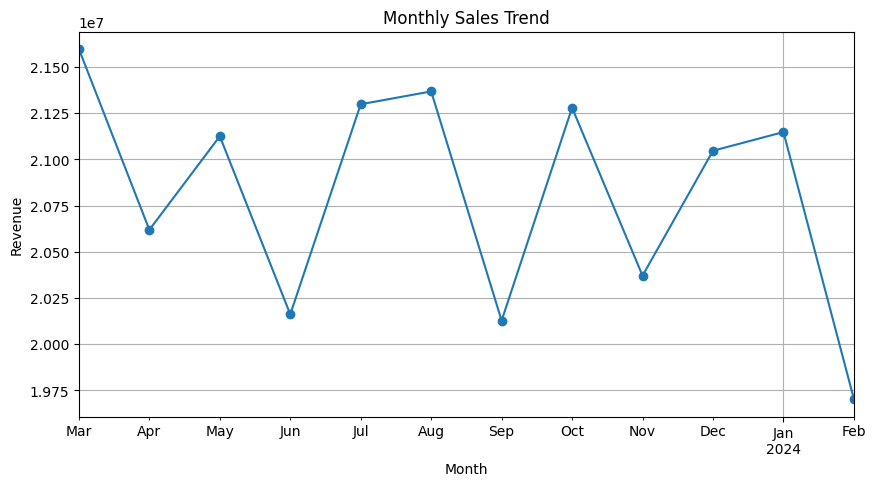

/tmp/ipykernel_290/96083676.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Product_Category'].value_counts().head(10).index,


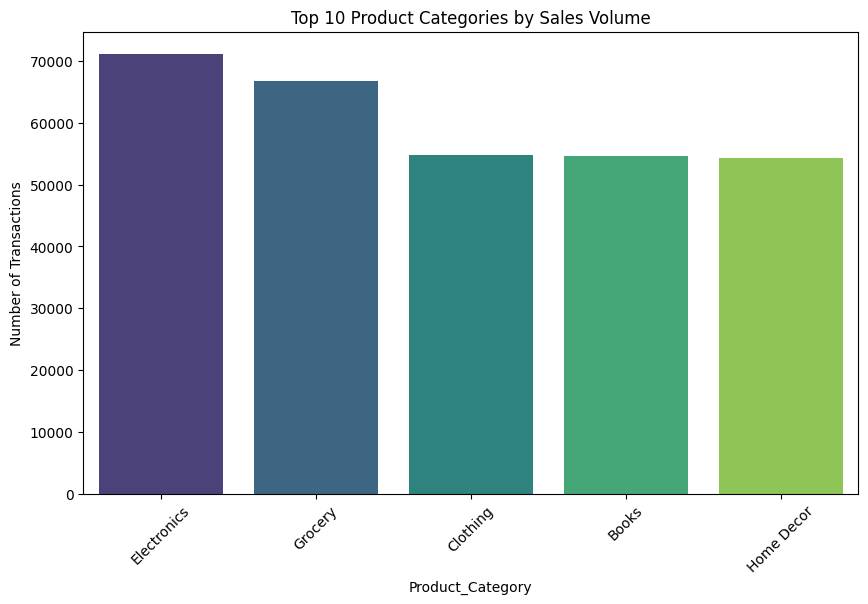

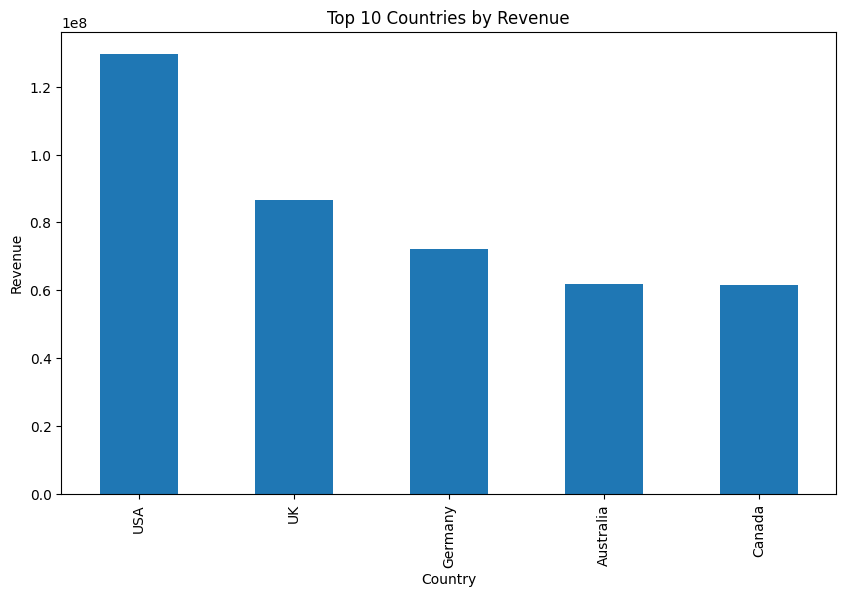

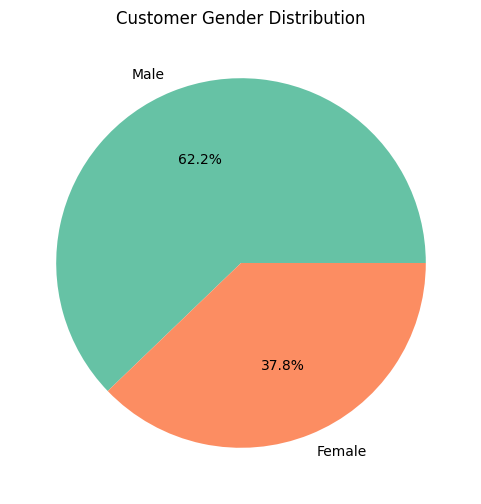

/tmp/ipykernel_290/96083676.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Payment_Method', order=df['Payment_Method'].value_counts().index, palette="coolwarm")


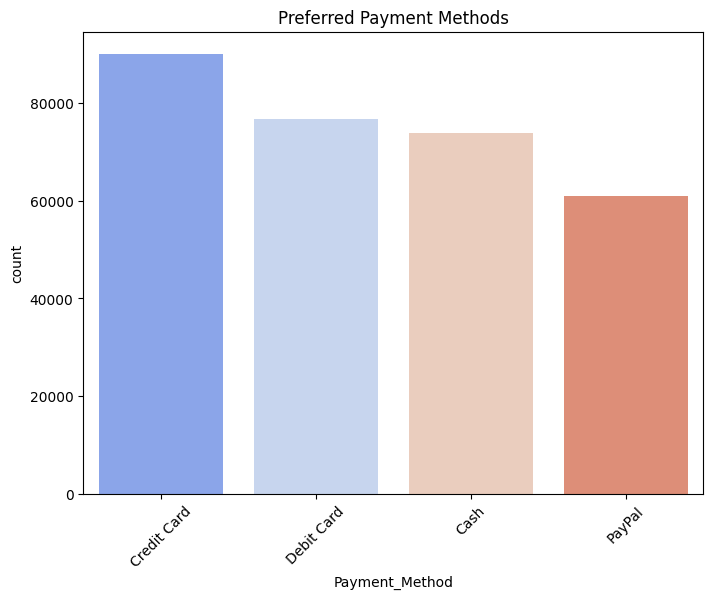

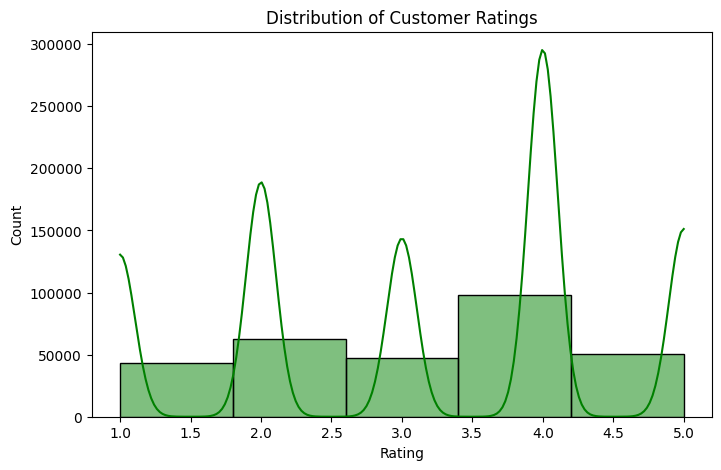

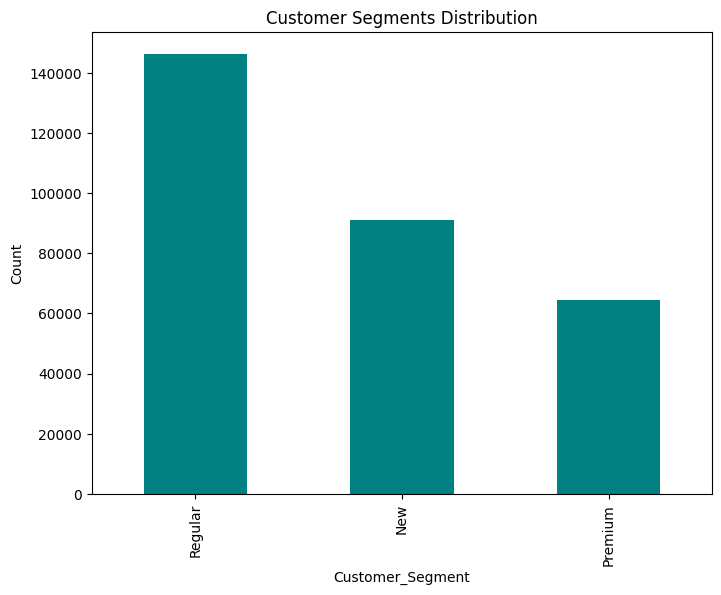

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/work/retail_data.csv")


df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


daily_sales = df.groupby(df['Date'].dt.to_period('M'))['Total_Amount'].sum()
daily_sales.plot(kind='line', figsize=(10,5), marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=df['Product_Category'].value_counts().head(10).index,
            y=df['Product_Category'].value_counts().head(10).values,
            palette="viridis")
plt.title("Top 10 Product Categories by Sales Volume")
plt.xticks(rotation=45)
plt.ylabel("Number of Transactions")
plt.show()


plt.figure(figsize=(10,6))
df.groupby('Country')['Total_Amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Revenue")
plt.show()


df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colors=["#66c2a5","#fc8d62","#8da0cb"])
plt.title("Customer Gender Distribution")
plt.ylabel("")
plt.show()


plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Payment_Method', order=df['Payment_Method'].value_counts().index, palette="coolwarm")
plt.title("Preferred Payment Methods")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8,5))
sns.histplot(df['Ratings'], bins=5, kde=True, color="green")
plt.title("Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(8,6))
df['Customer_Segment'].value_counts().plot(kind='bar', color='teal')
plt.title("Customer Segments Distribution")
plt.ylabel("Count")
plt.show()

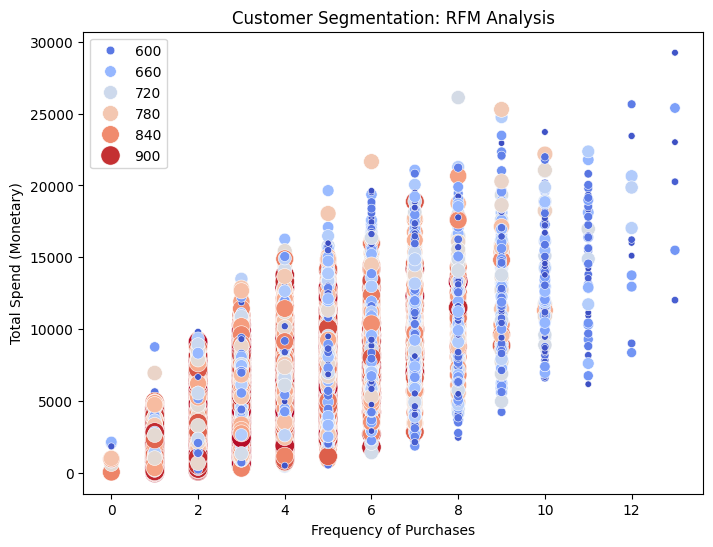

/tmp/ipykernel_290/1947910606.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_avg_ticket.index, y=category_avg_ticket.values, palette="mako")


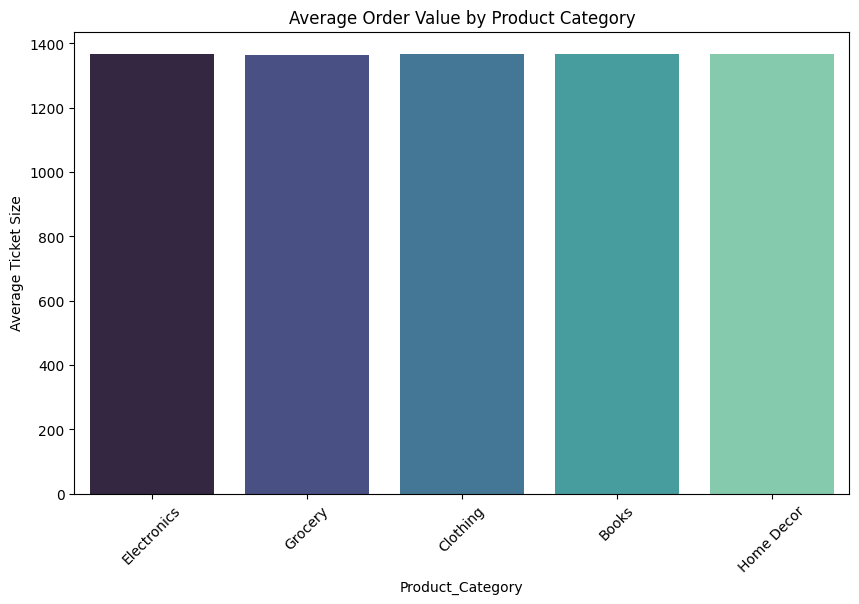

/tmp/ipykernel_290/1947910606.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clv.index.astype(str), y=top_clv['CLV'], palette="plasma")


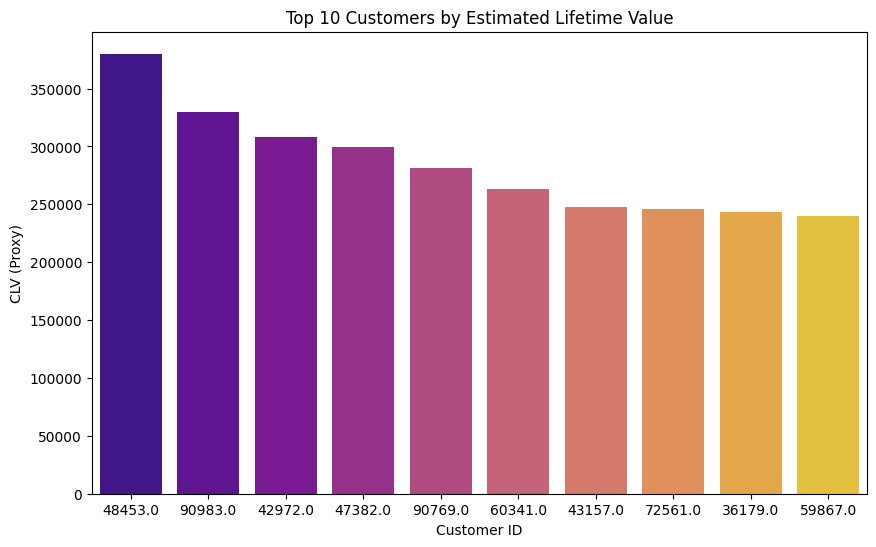

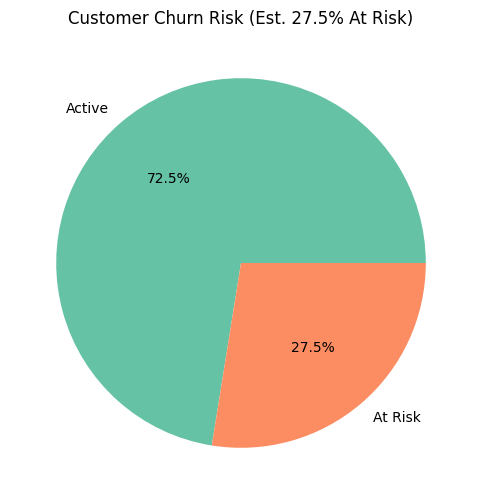

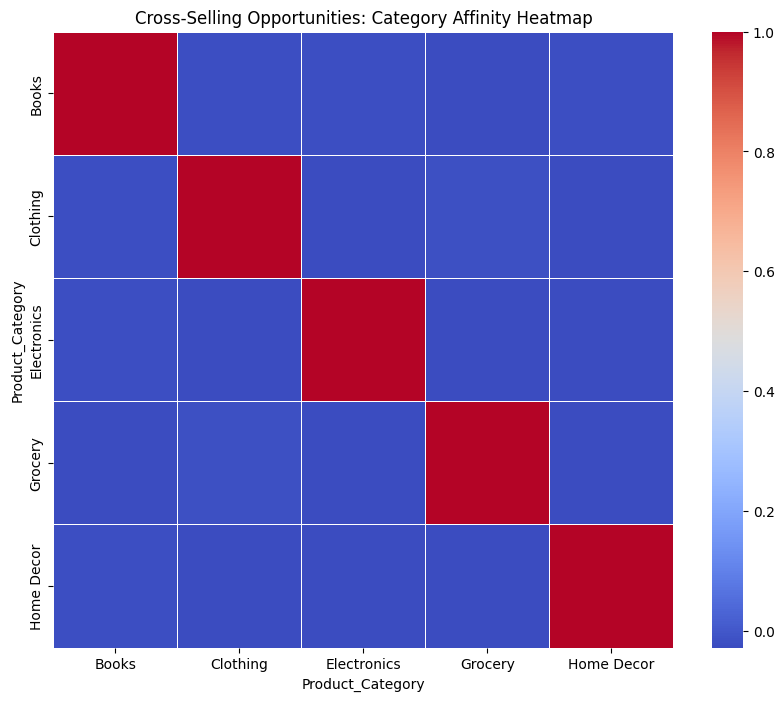

In [3]:


import matplotlib.pyplot as plt
import seaborn as sns


rfm = df.groupby('Customer_ID').agg({
    'Date': lambda x: (pd.to_datetime('today') - pd.to_datetime(x).max()).days,
    'Transaction_ID': 'count',
    'Total_Amount': 'sum'
}).rename(columns={'Date': 'Recency', 'Transaction_ID': 'Frequency', 'Total_Amount': 'Monetary'})

plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', size='Recency', hue='Recency', palette='coolwarm', sizes=(20,200))
plt.title("Customer Segmentation: RFM Analysis")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Total Spend (Monetary)")
plt.legend()
plt.show()



category_revenue = df.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False)
category_orders = df['Product_Category'].value_counts()
category_avg_ticket = category_revenue / category_orders

plt.figure(figsize=(10,6))
sns.barplot(x=category_avg_ticket.index, y=category_avg_ticket.values, palette="mako")
plt.title("Average Order Value by Product Category")
plt.xticks(rotation=45)
plt.ylabel("Average Ticket Size")
plt.show()



rfm['CLV'] = rfm['Frequency'] * rfm['Monetary']
top_clv = rfm.sort_values('CLV', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_clv.index.astype(str), y=top_clv['CLV'], palette="plasma")
plt.title("Top 10 Customers by Estimated Lifetime Value")
plt.xlabel("Customer ID")
plt.ylabel("CLV (Proxy)")
plt.show()



rfm['Churn_Risk'] = ((rfm['Recency'] > rfm['Recency'].median()) & (rfm['Frequency'] <= rfm['Frequency'].median())).astype(int)
churn_rate = rfm['Churn_Risk'].mean() * 100

plt.figure(figsize=(6,6))
rfm['Churn_Risk'].value_counts().plot.pie(autopct='%1.1f%%', labels=["Active","At Risk"], colors=["#66c2a5","#fc8d62"])
plt.title(f"Customer Churn Risk (Est. {churn_rate:.1f}% At Risk)")
plt.ylabel("")
plt.show()



cross = df.groupby(['Customer_ID','Product_Category']).size().unstack(fill_value=0)
cross_corr = cross.corr()

plt.figure(figsize=(10,8))
sns.heatmap(cross_corr, cmap="coolwarm", linewidths=0.5, linecolor="white", annot=False)
plt.title("Cross-Selling Opportunities: Category Affinity Heatmap")
plt.show()


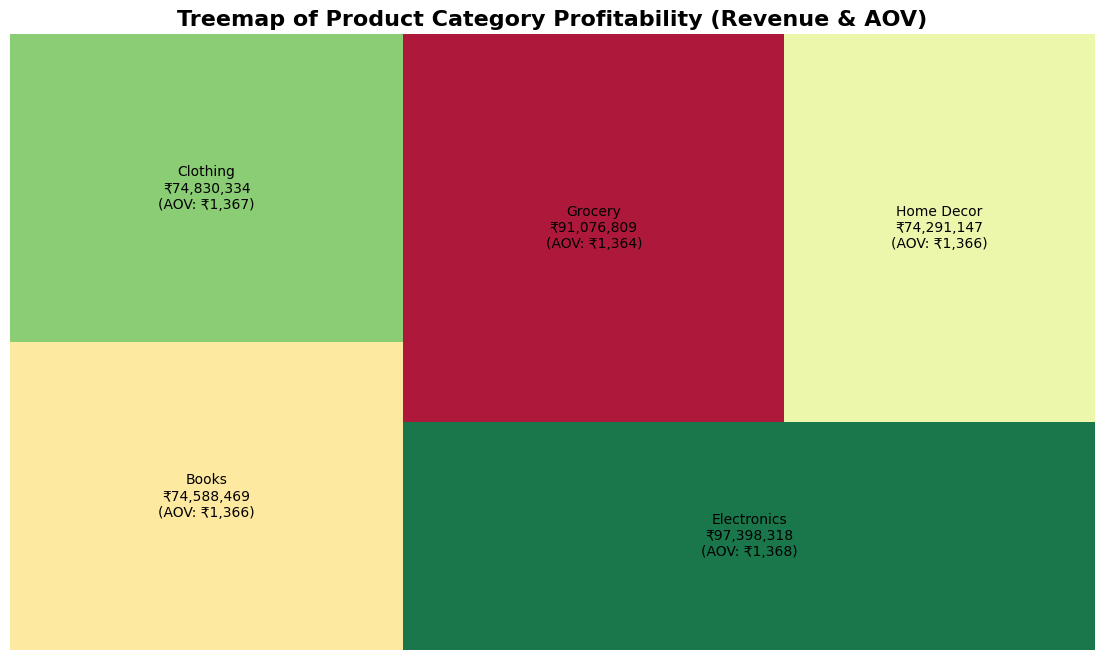

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import matplotlib.colors as mcolors


df = pd.read_csv("/work/retail_data.csv")


category_revenue = df.groupby('Product_Category')['Total_Amount'].sum()
category_orders = df['Product_Category'].value_counts()
category_avg_ticket = category_revenue / category_orders


sizes = category_revenue.values
labels = [f"{cat}\n₹{rev:,.0f}\n(AOV: ₹{aov:,.0f})" 
          for cat, rev, aov in zip(category_revenue.index, category_revenue.values, category_avg_ticket.values)]


norm = mcolors.Normalize(vmin=min(category_avg_ticket.values), vmax=max(category_avg_ticket.values))
cmap = plt.cm.get_cmap("RdYlGn")
colors = [cmap(norm(value)) for value in category_avg_ticket.values]


plt.figure(figsize=(14,8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.9, text_kwargs={'fontsize':10, 'color':'black'})
plt.title("Treemap of Product Category Profitability (Revenue & AOV)", fontsize=16, weight='bold')
plt.axis("off")
plt.show()


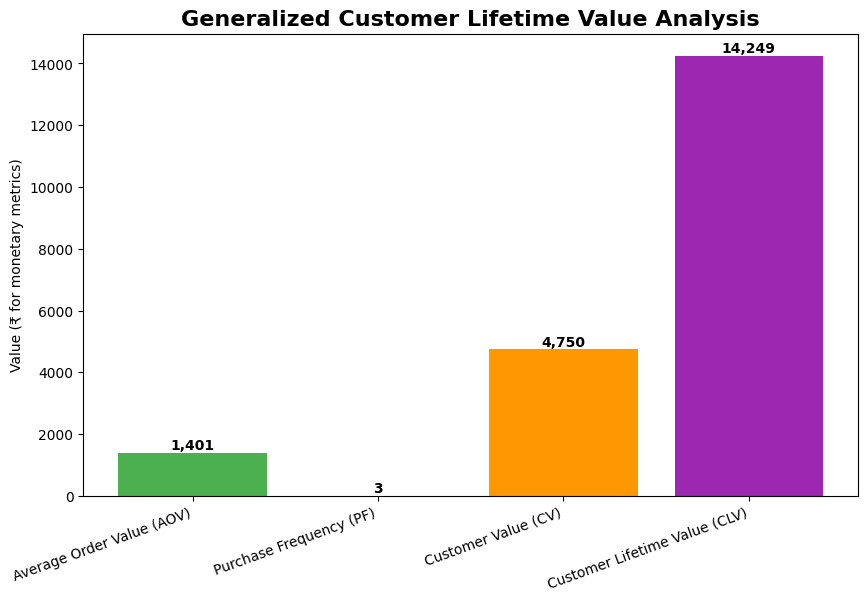

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/work/retail_data.csv")
df = df.dropna(subset=['Customer_ID'])


total_revenue = df['Total_Amount'].sum()
total_orders = df['Transaction_ID'].nunique()
aov = total_revenue / total_orders


unique_customers = df['Customer_ID'].nunique()
pf = total_orders / unique_customers


cv = aov * pf


avg_lifespan = 3
clv = cv * avg_lifespan


clv_summary = pd.DataFrame({
    "Metric": ["Average Order Value (AOV)", "Purchase Frequency (PF)", "Customer Value (CV)", "Customer Lifetime Value (CLV)"],
    "Value": [aov, pf, cv, clv]
})


plt.figure(figsize=(10,6))
bars = plt.bar(clv_summary["Metric"], clv_summary["Value"], color=["#4caf50","#2196f3","#ff9800","#9c27b0"])
plt.title("Generalized Customer Lifetime Value Analysis", fontsize=16, weight='bold')
plt.ylabel("Value (₹ for monetary metrics)")
plt.xticks(rotation=20, ha="right")


for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():,.0f}", 
             ha='center', va='bottom', fontsize=10, weight='bold')

plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c08ae31d-812d-4c44-919e-60206e5c1672' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>